In [107]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import scipy.signal as sig
import matplotlib.pyplot as plt

In [108]:
origin = -1
last = -1
def extract(file, test):
    global origin
    global last
    file = open(file)
    while True:
        line = file.readline()
        if not line:
            break
        arr = line.strip().split(',')
        #if origin == -1:
            #origin = int(arr[0])
        if arr[1] == "\"" + test + "\"":
            if int(arr[0])>=origin and int(arr[0])<last:
                arr[0] = int(arr[0])-origin
                yield arr
            
def signal(file):    
    global origin
    global last
    current = -1
    file = open(file)
    while True:
        line = file.readline()
        if not line:
            last = current
            break
        if not line.startswith("-"):
            arr = line.strip().split(',')
            if origin == -1:
                origin = int(arr[0])
            current = int(arr[0])
            arr[0] = int(arr[0]) - origin
            yield arr    

In [109]:
sig1 = list(signal("square/sampler1.sig"))
sig2 = list(signal("square/sampler2.sig"))
sig3 = list(signal("square/sampler3.sig"))
sig4 = list(signal("square/sampler4.sig"))

ping_inline = list(extract("square/bench.log", "SET"))

print(len(ping_inline))
print(len(sig1))
print(len(sig2))
print(len(sig3))
print(len(sig4))

83
131
131
131
131


In [110]:
#x = np.array([int(data[0]) for data in ping_inline])
x = np.array([data[0] for data in ping_inline], dtype=int)
y = np.array([data[2].replace('"','') for data in ping_inline], dtype=float)

sig1x = np.array([data[0] for data in sig1], dtype=int)
sig1y = np.array([data[1] for data in sig1], dtype=int)

sig2x = np.array([data[0] for data in sig2], dtype=int)
sig2y = np.array([data[1] for data in sig2], dtype=int)

sig3x = np.array([data[0] for data in sig3], dtype=int)
sig3y = np.array([data[1] for data in sig3], dtype=int)

sig4x = np.array([data[0] for data in sig4], dtype=int)
sig4y = np.array([data[1] for data in sig4], dtype=int)

Text(0.5,1,'I/O stress')

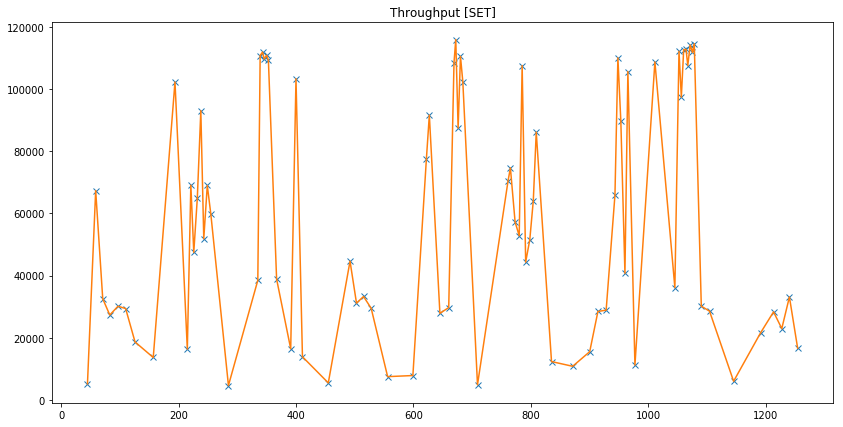

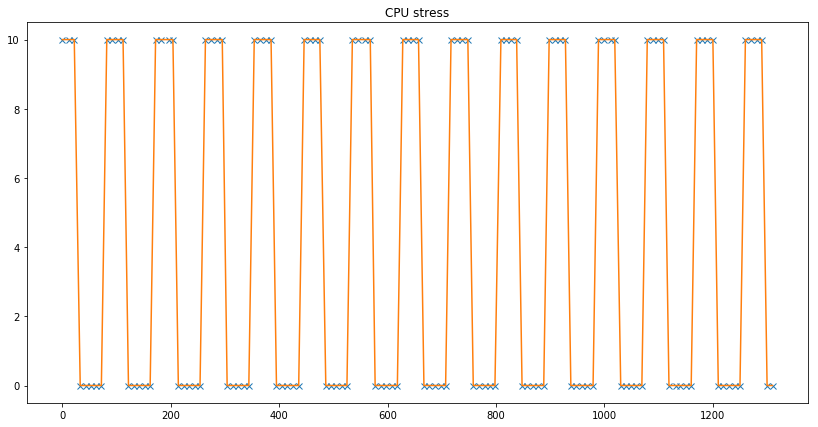

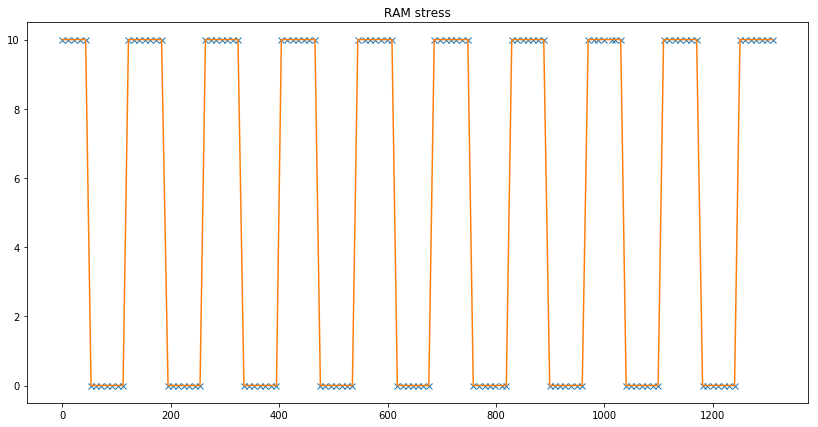

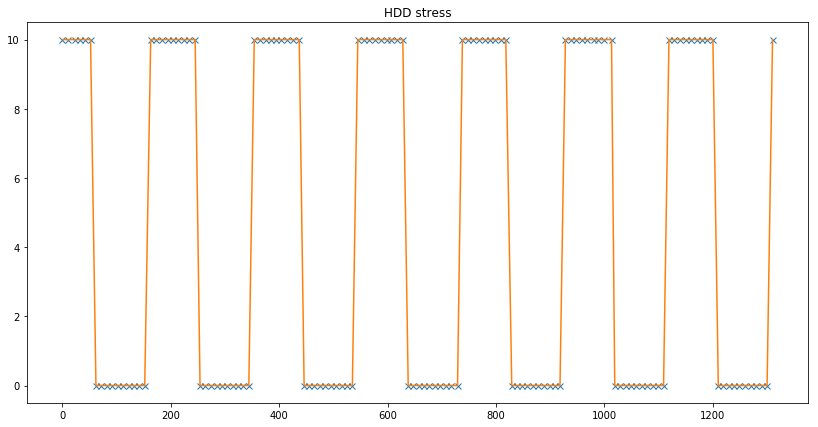

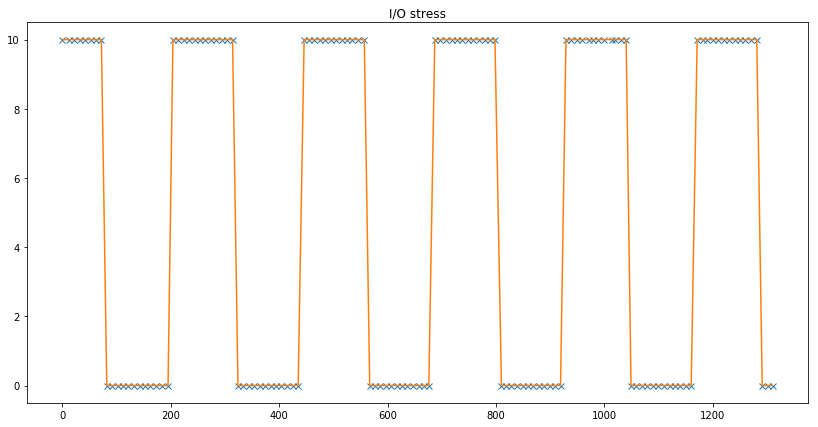

In [111]:
plt.figure(1, figsize=(14,7))
plt.plot(x,y,'x')
plt.plot(x,y)
plt.title('Throughput [SET]')

plt.figure(2, figsize=(14,7))
plt.plot(sig1x,sig1y,'x')
plt.plot(sig1x,sig1y)
plt.title('CPU stress')

plt.figure(3, figsize=(14,7))
plt.plot(sig2x,sig2y,'x')
plt.plot(sig2x,sig2y)
plt.title('RAM stress')

plt.figure(4, figsize=(14,7))
plt.plot(sig3x,sig3y,'x')
plt.plot(sig3x,sig3y)
plt.title('HDD stress')

plt.figure(5, figsize=(14,7))
plt.plot(sig4x,sig4y,'x')
plt.plot(sig4x,sig4y)
plt.title('I/O stress')

Text(0.5,1,'I/O correlation/convolution')

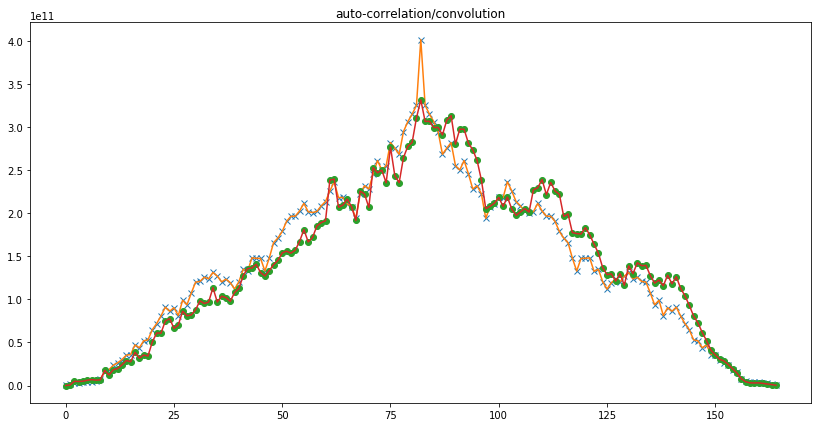

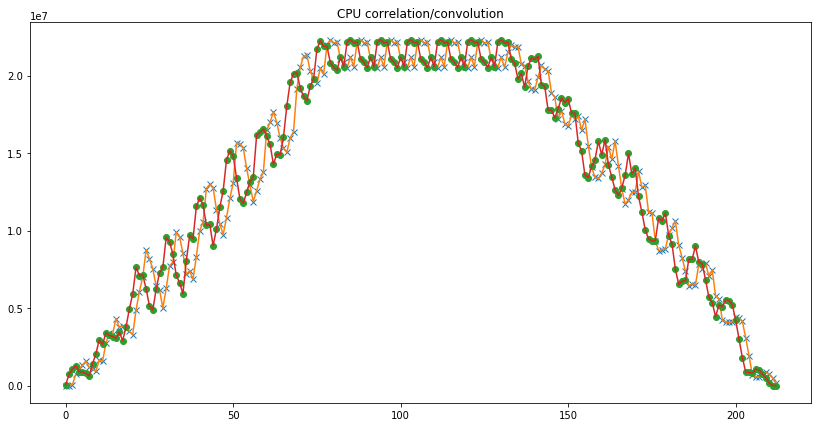

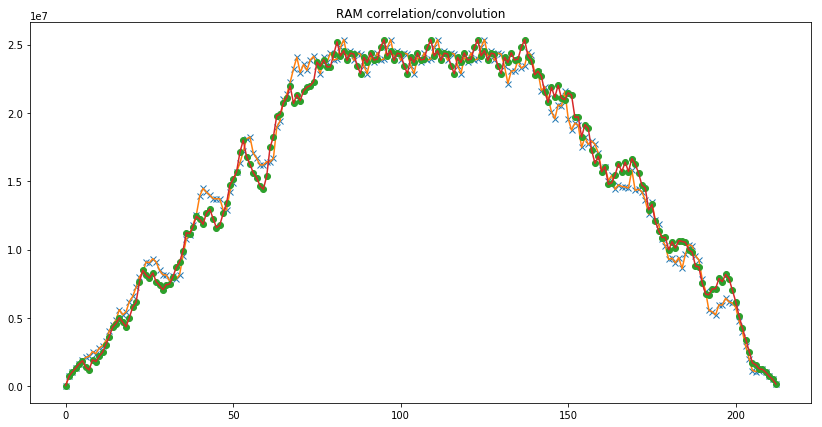

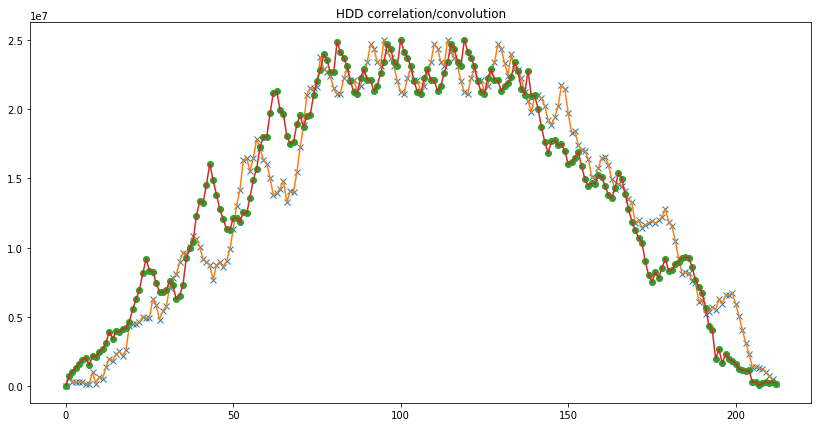

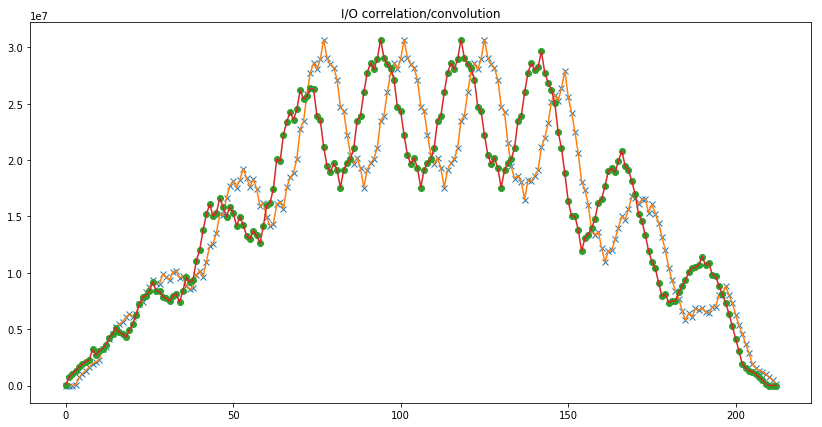

In [112]:
corr = np.correlate(y, y, "full")
conv = np.convolve(y, y, "full")
plt.figure(10, figsize=(14,7))
plt.plot(corr, 'x')
plt.plot(corr)
plt.plot(conv, 'o')
plt.plot(conv)
plt.title('auto-correlation/convolution')


corr1 = np.correlate(y, sig1y, "full")
conv1 = np.convolve(y, sig1y, "full")
plt.figure(6, figsize=(14,7))
plt.plot(corr1, 'x')
plt.plot(corr1)
plt.plot(conv1, 'o')
plt.plot(conv1)
plt.title('CPU correlation/convolution')

corr2 = np.correlate(y, sig2y, "full")
conv2 = np.convolve(y, sig2y, "full")
plt.figure(7, figsize=(14,7))
plt.plot(corr2, 'x')
plt.plot(corr2)
plt.plot(conv2, 'o')
plt.plot(conv2)
plt.title('RAM correlation/convolution')

corr3 = np.correlate(y, sig3y, "full")
conv3 = np.convolve(y, sig3y, "full")
plt.figure(8, figsize=(14,7))
plt.plot(corr3, 'x')
plt.plot(corr3)
plt.plot(conv3, 'o')
plt.plot(conv3)
plt.title('HDD correlation/convolution')

corr4 = np.correlate(y, sig4y, "full")
conv4 = np.convolve(y, sig4y, "full")
plt.figure(9, figsize=(14,7))
plt.plot(corr4, 'x')
plt.plot(corr4)
plt.plot(conv4, 'o')
plt.plot(conv4)
plt.title('I/O correlation/convolution')

(0, 0.5)

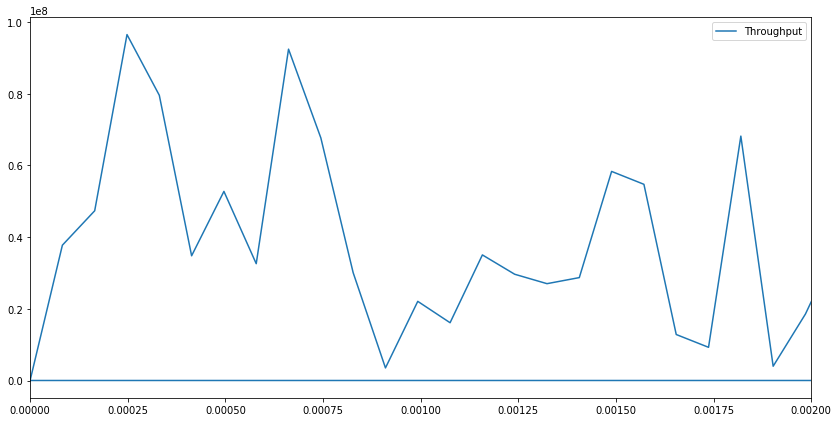

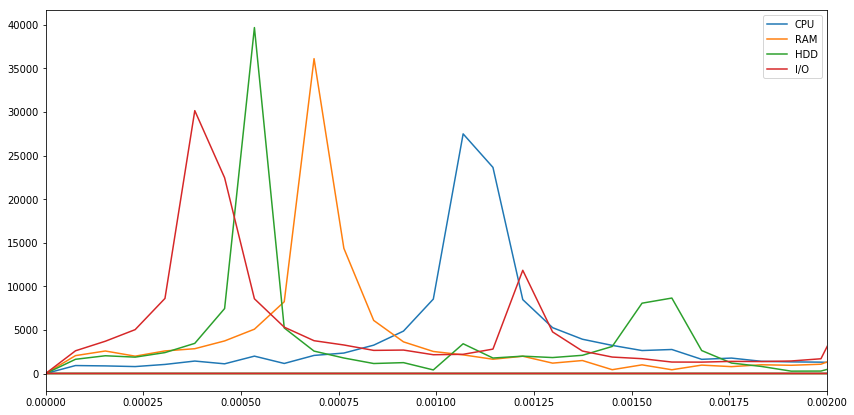

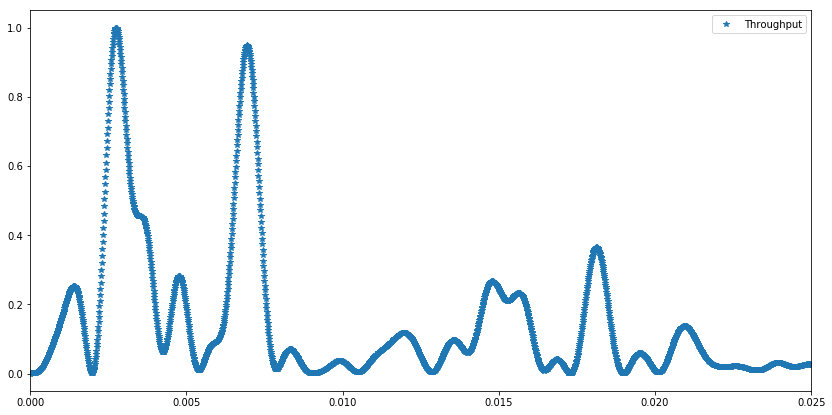

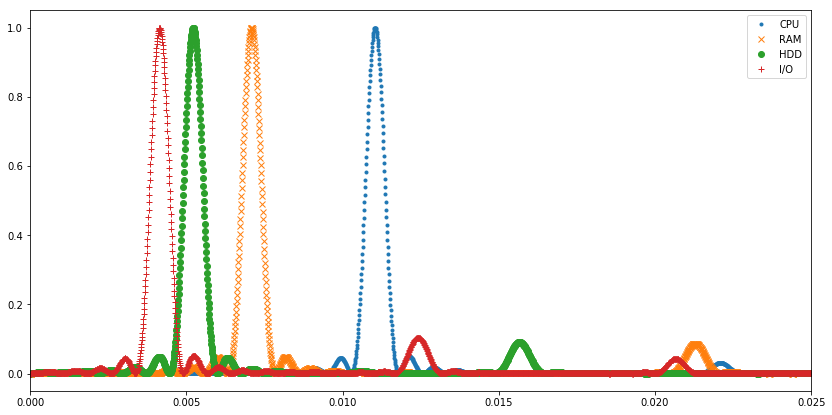

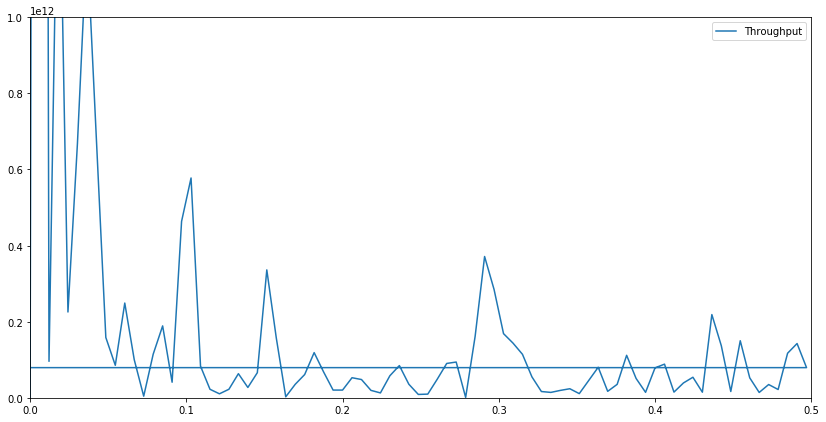

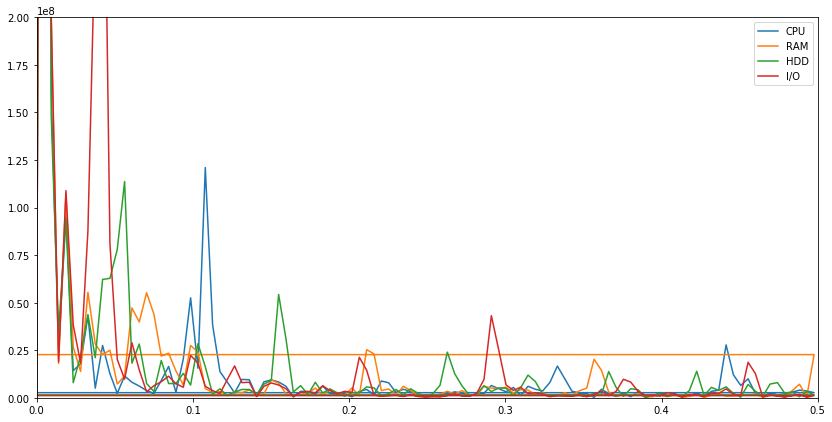

In [113]:
### Try some Fourier

def plotPeriodogram(x, y, c):
    times = np.arange(x[0],x[-1],1/10)
    sampled = np.interp(times, x, y)
    f,Pxx = sig.periodogram(sampled, fs=10, nfft=1e6)
    Pxx = Pxx/np.max(Pxx)
    plt.plot(f, Pxx, c)
    
def plotFFT(x, y, c):
    times = np.arange(x[0],x[-1],1/10)
    sampled = np.interp(times, x, y)
    #See if there are patterns repeating, using FFT on the IDS
    fft = np.fft.fft(sampled-np.mean(sampled))
    plt.plot(np.fft.fftfreq(fft.size),np.abs(fft))


plt.figure(100, figsize=(14,7))
plotFFT(x,y, '*')
plt.legend(['Throughput'])
plt.xlim(0,0.002)

plt.figure(101, figsize=(14,7))
plotFFT(sig1x, sig1y, '.')
plotFFT(sig2x, sig2y, 'x')
plotFFT(sig3x, sig3y, 'o')
plotFFT(sig4x, sig4y, '+')
plt.legend(['CPU','RAM','HDD','I/O'])
plt.xlim(0,0.002)

plt.figure(102, figsize=(14,7))
plotPeriodogram(x,y, '*')
plt.legend(['Throughput'])
plt.xlim(0,0.025)

plt.figure(103, figsize=(14,7))
plotPeriodogram(sig1x, sig1y, '.')
plotPeriodogram(sig2x, sig2y, 'x')
plotPeriodogram(sig3x, sig3y, 'o')
plotPeriodogram(sig4x, sig4y, '+')
plt.legend(['CPU','RAM','HDD','I/O'])
plt.xlim(0,0.025)





plt.figure(104, figsize=(14,7))
fft = np.fft.fft(conv-np.mean(conv))
plt.plot(np.fft.fftfreq(fft.size),np.abs(fft))
plt.legend(['Throughput'])
plt.ylim(0,1e12)
plt.xlim(0,0.5)

plt.figure(105, figsize=(14,7))
fft1 = np.fft.fft(conv1-np.mean(conv1))
plt.plot(np.fft.fftfreq(fft1.size),np.abs(fft1))
fft2 = np.fft.fft(conv2-np.mean(conv2))
plt.plot(np.fft.fftfreq(fft2.size),np.abs(fft2))
fft3 = np.fft.fft(conv3-np.mean(conv3))
plt.plot(np.fft.fftfreq(fft3.size),np.abs(fft3))
fft4 = np.fft.fft(conv4-np.mean(conv4))
plt.plot(np.fft.fftfreq(fft4.size),np.abs(fft4))
plt.legend(['CPU','RAM','HDD','I/O'])
plt.ylim(0,2e8)
plt.xlim(0,0.5)